# Visualizations

### This notebook explores the processed output of the ETL pipeline. 
The goal is to:
- validate that synthetic data behaves realisticly
- understand the transaction behaviour and distributions
- prepare insights which will later be used in dashboards.

In [7]:
# Import necessary modules and data files.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

customers = pd.read_csv("data/customers.csv")
accounts = pd.read_csv("data/accounts.csv")
transactions = pd.read_csv("data/transactions.csv")
flags = pd.read_csv("data/transaction_flags.csv")

customers.head(), accounts.head(), transactions.head(), flags.head()

(  customer_id          full_name date_of_birth country risk_rating
 0    CUST0001  Aysel Abdullayeva    1963-07-23      AZ         low
 1    CUST0002       Semed Aliyev    1974-11-19      GE      medium
 2    CUST0003      Ali Huseynova    1997-07-19      TR         low
 3    CUST0004  Gulnar Suleymanov    1982-04-27      AZ         low
 4    CUST0005      Ahmed Guliyev    1990-01-14      AZ         low,
   account_id customer_id account_type currency   balance opened_date
 0   ACC00001    CUST0001     checking      AZN  82496.15  1987-03-13
 1   ACC00002    CUST0001     checking      AZN  85104.73  1986-03-27
 2   ACC00003    CUST0002     checking      AZN  19451.03  2015-05-29
 3   ACC00004    CUST0002     checking      USD  73085.95  2020-02-03
 4   ACC00005    CUST0003      savings      EUR  64209.31  2016-10-22,
   transaction_id account_id            timestamp transaction_type  amount  \
 0     TXN0000001   ACC00001  2026-01-07 14:22:10         TRANSFER    8.76   
 1     TXN0000

### Transaction amount distribution
The goal of the plot below is to understand the distribution of transaction amounts and verify that small transactions appear more frequently than large ones.

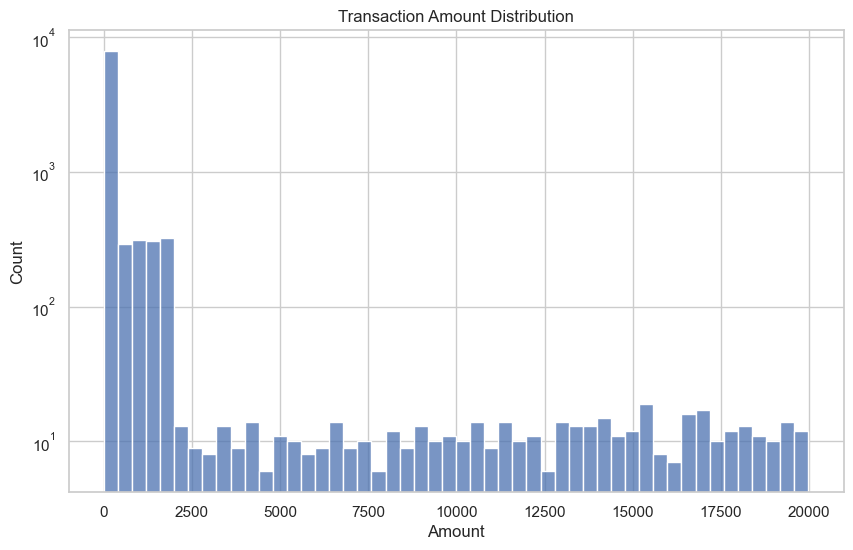

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions["amount"], bins=50, kde=False)
plt.yscale("log")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

As it is appearent from the plot that most transaction amounts are below 500. And frequency of the transactions decrease gradually as the amounts gets higher. 

### Transactions by Type
The figure above shows the count of transactions according to their type.

<function matplotlib.pyplot.show(close=None, block=None)>

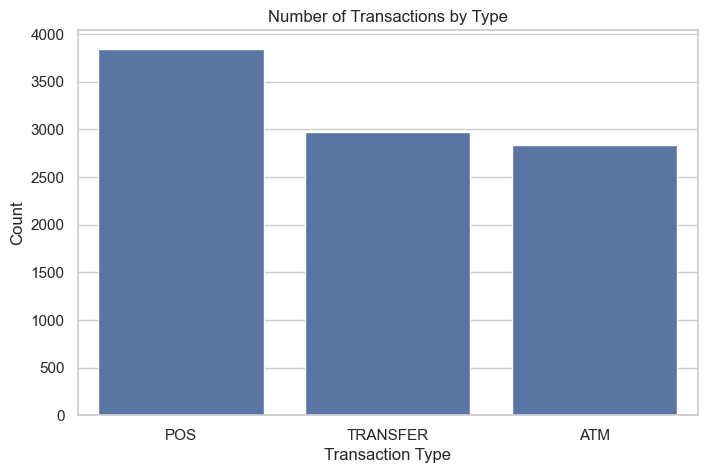

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=transactions, x="transaction_type", 
              order=transactions["transaction_type"].value_counts().index)
plt.title("Number of Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show

As seen from the fiigure, POS transactions dominate. This reflects realistic consumer behavior.

### Transactions by country
The goal of the plot is to validate domestic and foreign transaction behaviour. Most transactions should occur in the customer's home country.

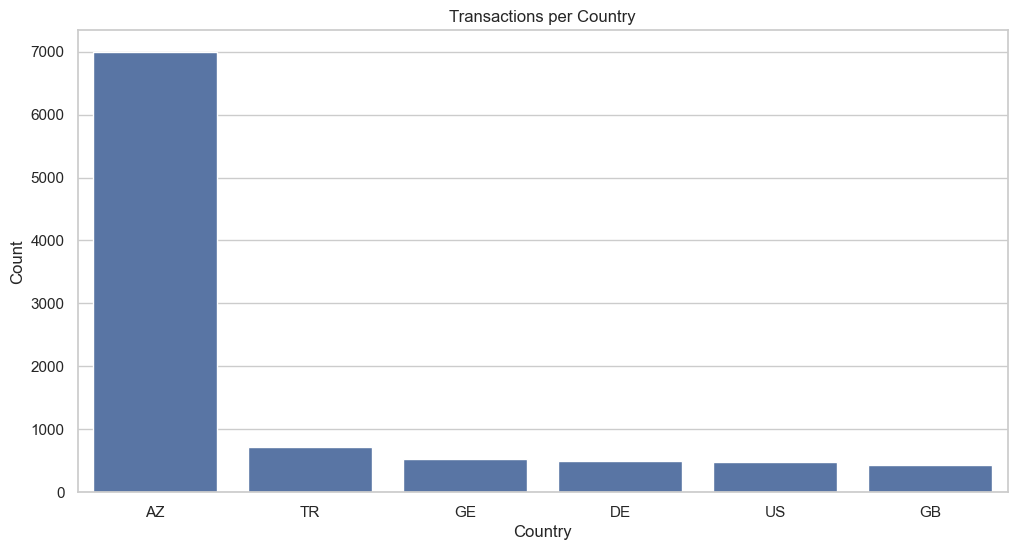

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=transactions, x="country", 
              order=transactions["country"].value_counts().index)
plt.title("Transactions per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

As seen from the graph, majority of the transactions occur in Azerbaijan (AZ). Only small percent of the transactions happened in foreign countries.

### Transaction flags overview
The purpose is to understand how many transactions triggered monitoring rules and how significant flags are compared to total volume.

In [15]:
total_tx = len(transactions)
flagged_tx = flags["transaction_id"].nunique()

pd.DataFrame({
    "Category": ["Total transactions", "Flagged transactions"],
    "Count": [total_tx, flagged_tx]
})

,Category,Count
0,Total transactions,9651
1,Flagged transactions,1734


Only a small fraction of transactions are flagged just like expected.

### Flags by type

The purpose of the plot is to identify which monitoring rules is triggered most frequently.

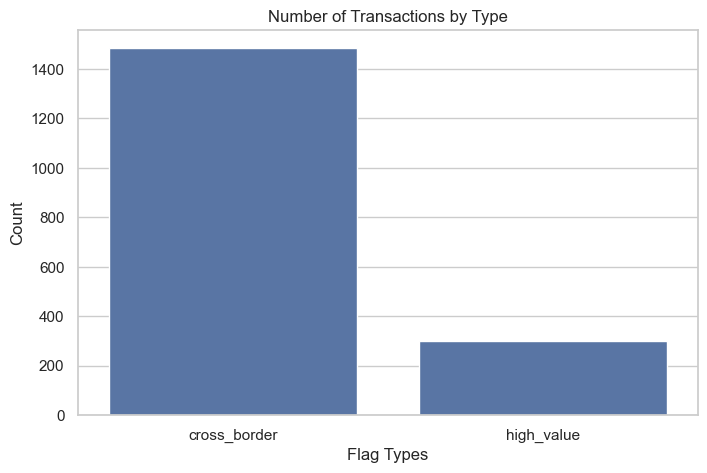

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=flags, x="flag_type", 
              order=flags["flag_type"].value_counts().index)

plt.title("Number of Transactions by Type")
plt.xlabel("Flag Types")
plt.ylabel("Count")
plt.show()

Cross border rule is triggered more than high value transaction rules. This is expected since high-value transactions are rarer that cross-border.

### Data Quality Notes

- Missing values were not checked on purpose
- The data is generated, so all IDs already match correctly
- Each account uses only one currency, and that rule is enforced
- All data changes were already done in the ETL step

This notebook focuses on **analysis**, not cleaning.